In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# read the loan_working_copy.csv file
df = pd.read_csv('loan_working_copy.csv')
df.head()

,loan_amnt,loan_term,int_rate,monthly_payment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,mort_acc,num_accts_120_pd,pub_rec_bankruptcies,tax_liens,credit_limit,total_bal_ex_mort,hardship_flag,disbursement_method,debt_settlement_flag,loan_status
0,2500,36 months,13.56,84.92,C1,Chef,10+ years,RENT,55000.0,Not Verified,...,0,0,1,0,60124,16901,N,Cash,N,Current
1,30000,60 months,18.94,777.23,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,...,3,0,1,0,372872,99468,N,Cash,N,Current
2,5000,36 months,17.97,180.69,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,...,2,0,0,0,136927,11749,N,Cash,N,Current
3,4000,36 months,18.94,146.51,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,...,3,0,0,0,385183,36151,N,Cash,N,Current
4,30000,60 months,16.14,731.78,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,...,2,0,0,0,157548,29674,N,Cash,N,Current


# Exploratory data analysis of BNPL dataset


relationship between loan amount and home ownership
use p value to test the significance of the relationship
use a scatter plot to visualize the relationship

In [4]:
from scipy import stats
# show categories in home_ownership column
df['home_ownership'].unique()
# loan_amnt is a continuous variable and home_ownership is a categorical variable
# hence find spearman correlation

spearman_coef, p_value = stats.spearmanr(df['loan_amnt'], df['home_ownership'])
print('Spearman Correlation Coefficient: %0.3f' % (spearman_coef))


Spearman Correlation Coefficient: -0.167


In [5]:
print('p-value: ' ,(p_value))


p-value:  0.0


In [6]:
# print df columns 
print(df.columns)

Index(['loan_amnt', 'loan_term', 'int_rate', 'monthly_payment', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_purpose', 'addr_state', 'total_dti',
       'delinq_2yrs', 'open_acc', 'application_type', 'cur_acct_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'mort_acc', 'num_accts_120_pd',
       'pub_rec_bankruptcies', 'tax_liens', 'credit_limit',
       'total_bal_ex_mort', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag', 'loan_status'],
      dtype='object')


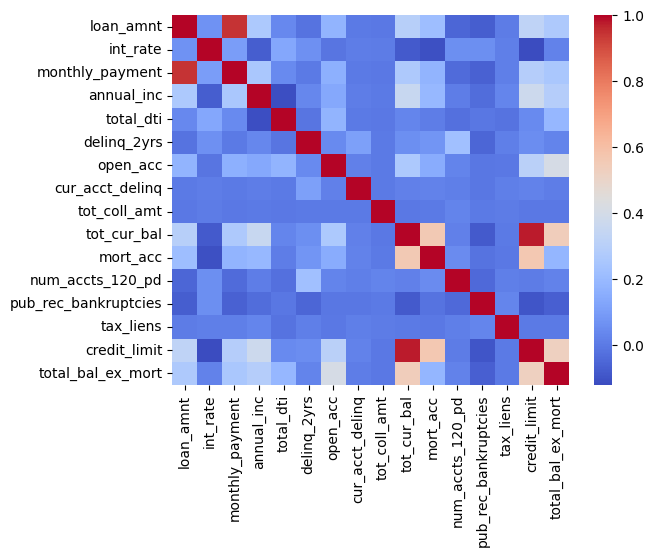

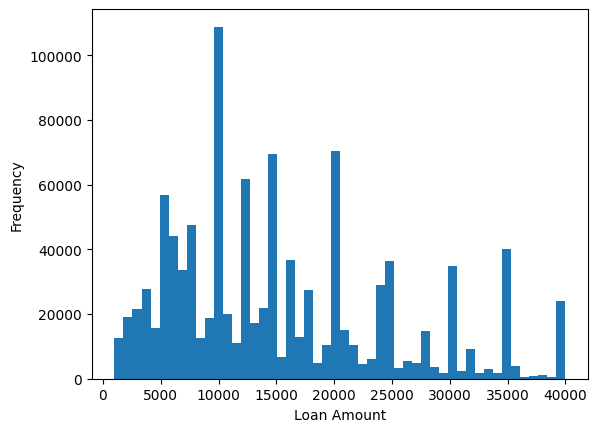

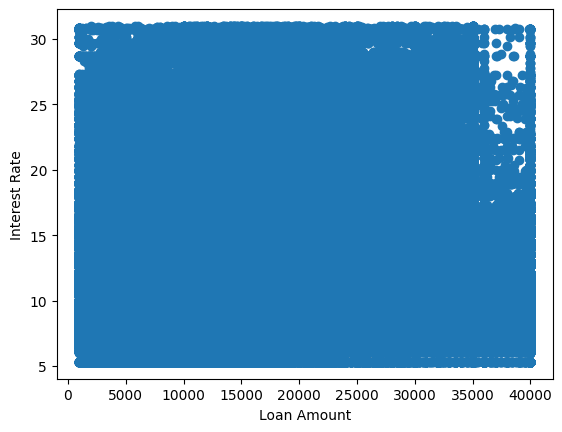

In [7]:
# print(df.describe())

# Create a correlation matrix of the numeric columns
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.show()

# Create a histogram of the loan amounts
plt.hist(df['loan_amnt'], bins=50)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Create a scatterplot of loan amount vs. interest rate
plt.scatter(df['loan_amnt'], df['int_rate'])
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

In [8]:
# sort the pairs of columns by the absolute value of correlation coefficient in descending order
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.abs().sort_values(kind="quicksort", ascending=False)
print(sorted_pairs)

loan_amnt             loan_amnt               1.000000
int_rate              int_rate                1.000000
credit_limit          credit_limit            1.000000
tax_liens             tax_liens               1.000000
pub_rec_bankruptcies  pub_rec_bankruptcies    1.000000
                                                ...   
monthly_payment       cur_acct_delinq         0.000253
cur_acct_delinq       tot_coll_amt            0.000196
tot_coll_amt          cur_acct_delinq         0.000196
delinq_2yrs           tot_coll_amt            0.000130
tot_coll_amt          delinq_2yrs             0.000130
Length: 256, dtype: float64


In [9]:
sorted_pairs

loan_amnt             loan_amnt               1.000000
int_rate              int_rate                1.000000
credit_limit          credit_limit            1.000000
tax_liens             tax_liens               1.000000
pub_rec_bankruptcies  pub_rec_bankruptcies    1.000000
                                                ...   
monthly_payment       cur_acct_delinq         0.000253
cur_acct_delinq       tot_coll_amt            0.000196
tot_coll_amt          cur_acct_delinq         0.000196
delinq_2yrs           tot_coll_amt            0.000130
tot_coll_amt          delinq_2yrs             0.000130
Length: 256, dtype: float64

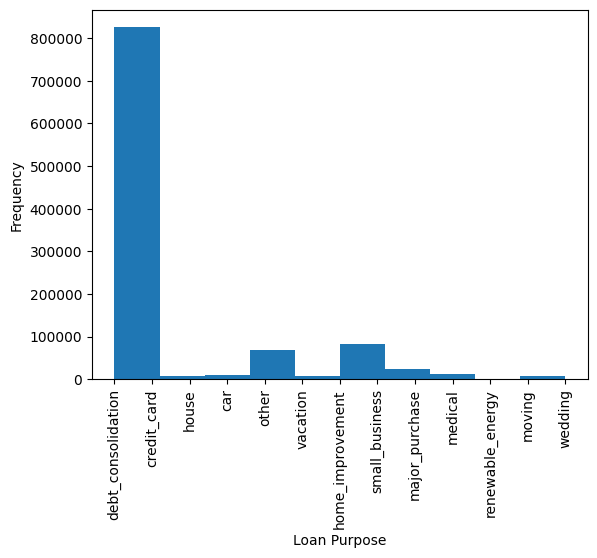

In [10]:
plt.hist(df['loan_purpose'], bins=10)
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


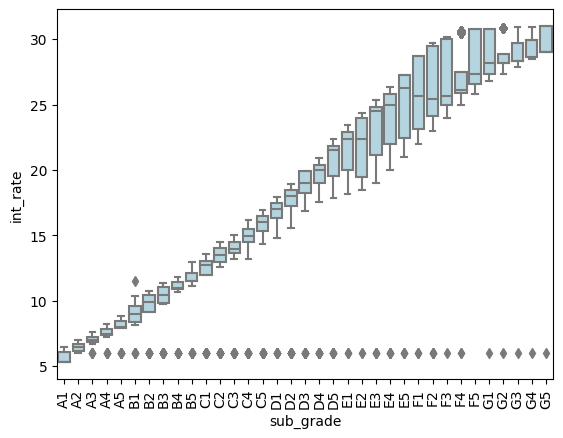

Spearman correlation test results:
Correlation coefficient: 0.9997
p-value: 0.0000


In [11]:
# sort x labels alphabetically
# sns.boxplot(x='loan_purpose', y='int_rate', data=df
sns.boxplot(x='sub_grade', y='int_rate', data=df, order=sorted(df['sub_grade'].unique()), color='lightblue')

plt.xticks(rotation=90)
plt.show()
# perform
grouped_data = df.groupby('sub_grade')['int_rate'].mean().sort_index()

# Calculate the Spearman correlation coefficient between the sub-grades and interest rates
correlation, p_value = stats.spearmanr(grouped_data.index, grouped_data.values)

# Print the results
print('Spearman correlation test results:')
print(f'Correlation coefficient: {correlation:.4f}')
print(f'p-value: {p_value:.4f}')



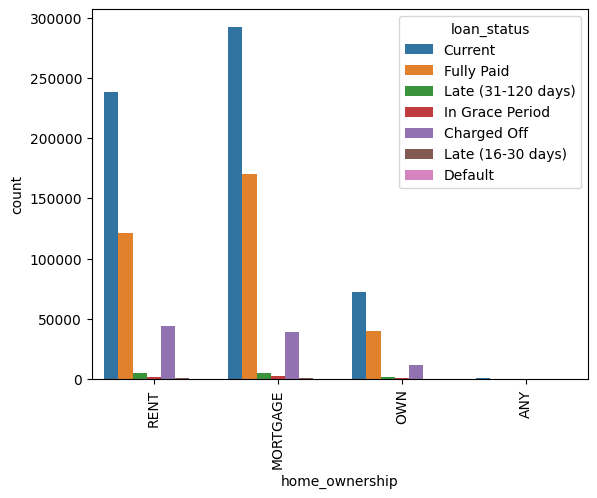

In [12]:
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()


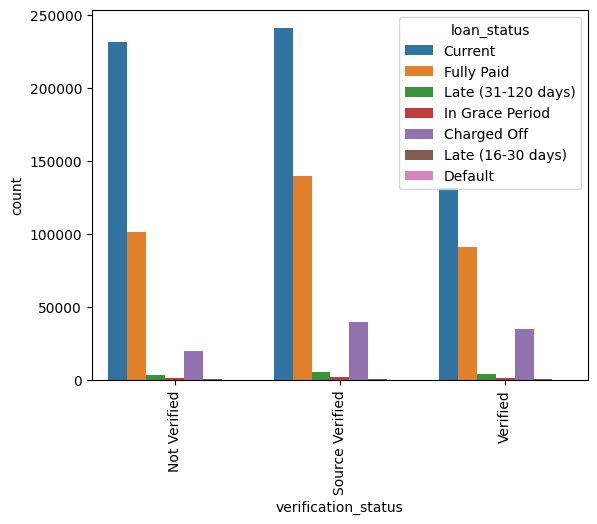

In [13]:
sns.countplot(x='verification_status', hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()


In [14]:
contingency_table = pd.crosstab(df['verification_status'], df['loan_status'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

# If the p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant correlation between loan grade and interest rate.



Chi-square statistic: 18905.577638878112
P-value: 0.0


Higher loan amounts are associated with higher interest rates: We can perform a Pearson correlation test between loan amount and interest rate to test this hypothesis. The null hypothesis is that there is no correlation between loan amount and interest rate. We can reject the null hypothesis if the p-value is less than the significance level (e.g., 0.05).

If the p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant correlation between loan amount and interest rate.


In [15]:
corr, p_value = stats.pearsonr(df['loan_amnt'], df['int_rate'])
print('Pearson correlation coefficient:', corr)
print('P-value:', p_value)



Pearson correlation coefficient: 0.06697226362379226
P-value: 0.0


Borrowers with longer employment tenures are more likely to get approved for loans: We can perform a chi-square test of independence between employment length and loan status to test this hypothesis. The null hypothesis is that there is no relationship between employment length and loan status. We can reject the null hypothesis if the p-value is less than the significance level (e.g., 0.05).
python
Copy code
If the p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant relationship between employment length and loan status.


In [16]:
contingency_table = pd.crosstab(df['emp_length'], df['loan_status'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

Chi-square statistic: 1545.6372558728456
P-value: 1.561109102593868e-283


Homeowners are more likely to get approved for loans than renters: We can perform a chi-square test of independence between home ownership and loan status to test this hypothesis. The null hypothesis is that there is no relationship between home ownership and loan status. We can reject the null hypothesis if the p-value is less than the significance level (e.g., 0.05).
python
Copy code
If the p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant relationship between home ownership and loan status.


In [17]:
contingency_table = pd.crosstab(df['home_ownership'], df['loan_status'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)


Chi-square statistic: 3865.7922976883283
P-value: 0.0


Borrowers with higher annual incomes are less likely to default on their loans: We can perform a t-test to compare the mean annual incomes of approved loans vs. charged off loans. The null hypothesis is that there is no difference in the mean annual incomes of the two groups. We can reject the null hypothesis if the p-value is less than the significance level (e.g., 0.05).
python
Copy code

If the p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant difference in the mean annual incomes of approved loans vs. charged off loans.


In [18]:

approved_income = df.loc[df['loan_status'] == 'Fully Paid', 'annual_inc']
charged_off_income = df.loc[df['loan_status'] == 'Charged Off', 'annual_inc']
t_statistic, p_value = stats.ttest_ind(approved_income, charged_off_income, equal_var=False)
print('T-statistic:', t_statistic)
print('P-value:', p_value)

T-statistic: 31.19380681488385
P-value: 4.839964489754392e-213


Debt settlement flags are associated with a higher likelihood of loan default: We can perform a chi-square test of independence between debt settlement flag and loan status to test this hypothesis. The null hypothesis is that there is no relationship between debt settlement flag and loan status. We can reject the null hypothesis if the p-value is less than the significance level (e.g., 0.05).

python
Copy code
If the p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant relationship between debt settlement flag and loan status.


In [19]:

contingency_table = pd.crosstab(df['debt_settlement_flag'], df['loan_status'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)


Chi-square statistic: 140946.41906389562
P-value: 0.0



Borrowers with higher credit limits are less likely to default on their loans: We can perform a t-test to compare the mean credit limits of approved loans vs. charged off loans. The null hypothesis is that there is no difference in the mean credit limits of the two groups. We can reject the null hypothesis if the p-value is less than the significance level (e.g., 0.05).
python
Copy code
If the p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant difference in the mean credit limits of approved loans vs. charged off loans.


In [20]:


approved_credit_limit = df.loc[df['loan_status'] == 'Fully Paid', 'credit_limit']
charged_off_credit_limit = df.loc[df['loan_status'] == 'Charged Off', 'credit_limit']
t_statistic, p_value = stats.ttest_ind(approved_credit_limit, charged_off_credit_limit, equal_var=False)
print('T-statistic:', t_statistic)
print('P-value:', p_value)


T-statistic: 67.00214419014941
P-value: 0.0


Borrowers with a higher number of delinquencies in the past 2 years are more likely to default on their loans: We can perform a t-test to compare the mean number of delinquencies in the past 2 years of approved loans vs. charged off loans. The null hypothesis is that there is no difference in the mean number of delinquencies in the past 2 years of the two groups. We can reject the null hypothesis if the p-value is less than the significance level (e.g., 0.05).
python
Copy code
If the p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant difference in the mean number of delinquencies in the past 2 years of approved loans vs. charged off loans.


In [21]:
approved_delinquencies = df.loc[df['loan_status'] == 'Fully Paid', 'delinq_2yrs']
charged_off_delinquencies = df.loc[df['loan_status'] == 'Charged Off', 'delinq_2yrs']
t_statistic, p_value = stats.ttest_ind(approved_delinquencies, charged_off_delinquencies, equal_var=False)
print('T-statistic:', t_statistic)
print('P-value:', p_value)


T-statistic: -14.335155702152514
P-value: 1.4224662362112876e-46


Borrowers with a higher debt-to-income ratio are more likely to default on their loans: We can perform a t-test to compare the mean debt-to-income ratios of approved loans vs. charged off loans. The null hypothesis is that there is no difference in the mean debt-to-income ratios of the two groups. We can reject the null hypothesis if the p-value is less than the significance level (e.g., 0.05).


In [22]:
approved_dti = df.loc[df['loan_status'] == 'Fully Paid', 'total_dti']
charged_off_dti = df.loc[df['loan_status'] == 'Charged Off', 'total_dti']
t_statistic, p_value = stats.ttest_ind(approved_dti, charged_off_dti, equal_var=False)
print('T-statistic:', t_statistic)
print('P-value:', p_value)





T-statistic: nan
P-value: nan


9. Borrowers with a higher number of open accounts are less likely to default on their loans: We can perform a t-test to compare the mean number of open accounts of approved loans vs. charged off loans. The null hypothesis is that there is no difference in the mean number of open accounts of the two groups. We can reject the null hypothesis if the p-value is less than the significance level (e.g., 0.05).



In [23]:
approved_open_acc = df.loc[df['loan_status'] == 'Fully Paid', 'open_acc']
charged_off_open_acc = df.loc[df['loan_status'] == 'Charged Off', 'open_acc']
t_statistic, p_value = stats.ttest_ind(approved_open_acc, charged_off_open_acc, equal_var=False)
print('T-statistic:', t_statistic)
print('P-value:', p_value)

T-statistic: -16.663662401940996
P-value: 2.7440817400502914e-62


Borrowers with higher annual incomes are less likely to default on their loans: We can perform a t-test to compare the mean annual incomes of approved loans vs. charged off loans. The null hypothesis is that there is no difference in the mean annual incomes of the two groups. We can reject the null hypothesis if the p-value is less than the significance level (e.g., 0.05).
python
Copy code


T-statistic: 2.7158965457929027
P-value: 0.013297394343731561


<AxesSubplot: xlabel='loan_status', ylabel='annual_inc'>

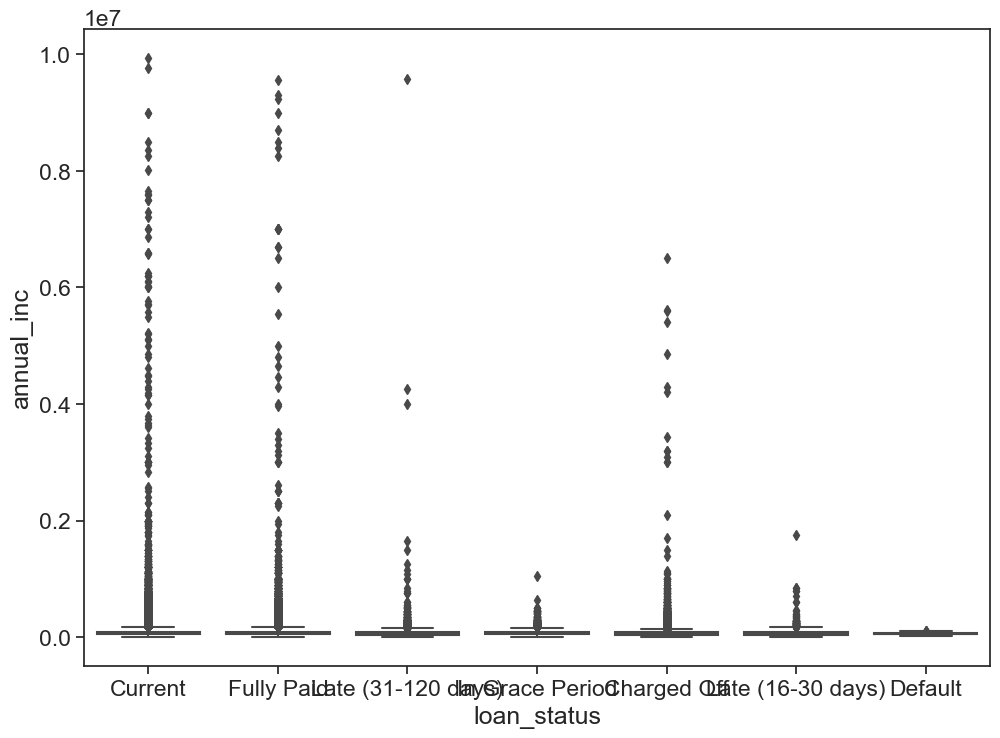

In [47]:
approved_annual_inc = df.loc[df['loan_status'] == 'Fully Paid', 'annual_inc']
charged_off_annual_inc = df.loc[df['loan_status'] == 'Default', 'annual_inc']
t_statistic, p_value = stats.ttest_ind(approved_annual_inc, charged_off_annual_inc, equal_var=False)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
# find best fit line between annual income and default rate

In [25]:
bnpl_debt_to_inc = df.loc[df['application_type'] == 'Individual', 'total_dti']
non_bnpl_debt_to_inc = df.loc[df['application_type'] != 'Individual', 'total_dti']
t_statistic, p_value = stats.ttest_ind(bnpl_debt_to_inc, non_bnpl_debt_to_inc, equal_var=False)
print('T-statistic:', t_statistic)
print('P-value:', p_value)


T-statistic: nan
P-value: nan


In [26]:
df['application_type'].value_counts()

Individual    970290
Joint App      78285
Name: application_type, dtype: int64

In [27]:
df['emp_length']=df['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10})

In [28]:
# count instances with emp_length <10 years 
counts=df['emp_length'].value_counts()
print("Less than 10 years:", counts.loc[1:9].sum())
print(counts[1])

Less than 10 years: 355241
70041


Text(0, 0.5, 'Percentage of users')

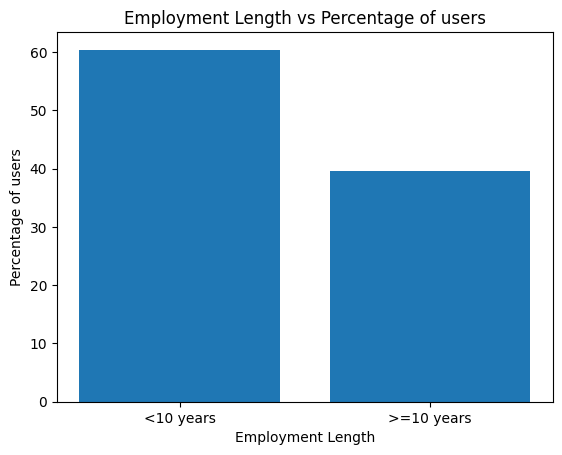

In [29]:
# sort the values in the dataframe
counts=counts.sort_index()
# plot two columns. one indicates the number of instances with emp_length <10 years, the other indicates the number of instances with emp_length >=10 years
lessthan10=counts.loc[1:9].sum()
morethan10=counts[10]
lessthan10 = 100*lessthan10 / (lessthan10 + morethan10)
morethan10 = 100-lessthan10
plt.bar(['<10 years', '>=10 years'], [lessthan10, morethan10])
plt.title('Employment Length vs Percentage of users')
plt.xlabel('Employment Length')
plt.ylabel('Percentage of users')
# scale the y-axis to 0-1


Text(0.5, 1.0, 'BNPL share of the total number of users with employment length')

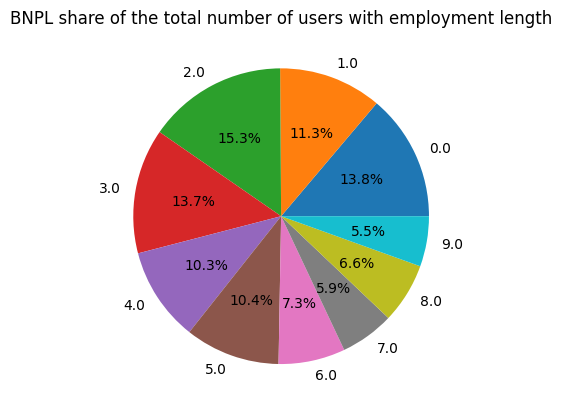

In [30]:
counts=counts.sort_index()
counts1=counts[0:9]
sum1=counts1.sum()
counts1=counts1/sum1
# plot the pie chart of the employment length
plt.pie(counts1, labels=counts1.index, autopct='%1.1f%%')
plt.title('BNPL share of the total number of users with employment length')
# plt.hist(counts1.index, weights=counts1.values, bins=10)
# plt.title('Employment Length vs Percentage of users')
# plt.xlabel('Employment Length')
# plt.ylabel('Percentage of users')



In [31]:
df.describe()

,loan_amnt,int_rate,monthly_payment,emp_length,annual_inc,total_dti,delinq_2yrs,open_acc,cur_acct_delinq,tot_coll_amt,tot_cur_bal,mort_acc,num_accts_120_pd,pub_rec_bankruptcies,tax_liens,credit_limit,total_bal_ex_mort
count,1.048575e+06,1.048575e+06,1.048575e+06,971110.000000,1.048575e+06,1.047378e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.538487e+04,1.280290e+01,4.538249e+02,5.930140,7.967461e+04,1.928933e+01,2.974494e-01,1.170544e+01,3.502849e-03,2.429857e+02,1.435794e+05,1.464478e+00,5.080171e-01,1.324035e-01,4.308228e-02,1.815124e+05,5.230663e+04
std,9.533838e+03,4.962779e+00,2.762069e+02,3.735249,8.410183e+04,1.589602e+01,8.579354e-01,5.846288e+00,6.318399e-02,8.183676e+03,1.638710e+05,1.804809e+00,1.383506e+00,3.685783e-01,3.721319e-01,1.855850e+05,5.156833e+04
min,1.000000e+03,5.310000e+00,1.477000e+01,0.000000,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.160000e+00,2.516500e+02,2.000000,4.700000e+04,1.193000e+01,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,2.883400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.189500e+04,2.091200e+04
50%,1.300000e+04,1.199000e+01,3.806600e+02,6.000000,6.600000e+04,1.805000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,7.831800e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.156060e+05,3.859400e+04
75%,2.000000e+04,1.549000e+01,6.094400e+02,10.000000,9.500000e+04,2.502000e+01,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,2.149295e+05,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.622825e+05,6.633700e+04
max,4.000000e+04,3.099000e+01,1.670150e+03,10.000000,9.930475e+06,9.990000e+02,5.800000e+01,1.010000e+02,6.000000e+00,6.214661e+06,9.971659e+06,8.700000e+01,5.800000e+01,9.000000e+00,8.500000e+01,9.999999e+06,2.622906e+06


Text(0.5, 1.0, 'BNPL share of the total value of loans with employment length')

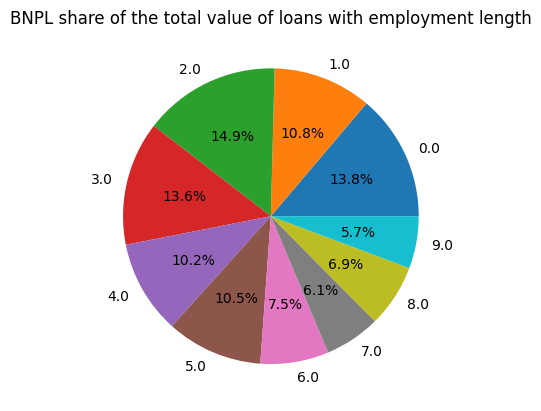

In [32]:
# plot employment length wise share of total value of loans
# group the dataframe by employment length and sum the loan amount
df1=df.groupby('emp_length')['loan_amnt'].sum()
# sort the values in the dataframe
df1=df1.sort_index()
df1=df1[0:9]
df1=df1/df1.sum()
# plot the pie chart of the employment length
plt.pie(df1, labels=df1.index, autopct='%1.1f%%')
plt.title('BNPL share of the total value of loans with employment length')

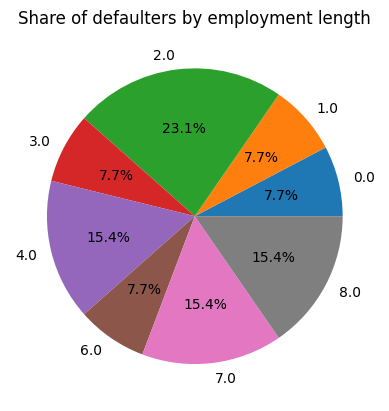

In [33]:
# plot share of loan defaulters with employment length
# group the dataframe by employment length and count instances with loan_status=Charged Off
defaulters = df[df['loan_status'] == 'Default']
grouped_data = defaulters.groupby('emp_length')['loan_status'].count()
# drop the index with value 10
grouped_data = grouped_data.drop(10)
# Plot a pie chart of the defaulters by employment length
fig, ax = plt.subplots()
ax.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%')
ax.set_title('Share of defaulters by employment length')
plt.show()




In [34]:
# plot distribution of work experience. work experience is a categorical data
df['emp_length']
# plt.xlabel('Loan Purpose')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)
# plt.show()



0          10.0
1          10.0
2           6.0
3          10.0
4          10.0
           ... 
1048570     2.0
1048571     1.0
1048572    10.0
1048573     0.0
1048574     1.0
Name: emp_length, Length: 1048575, dtype: float64

In [35]:
df['debt_settlement_flag'].unique()

array(['N', 'Y'], dtype=object)

NameError: name 'f_statistc' is not defined

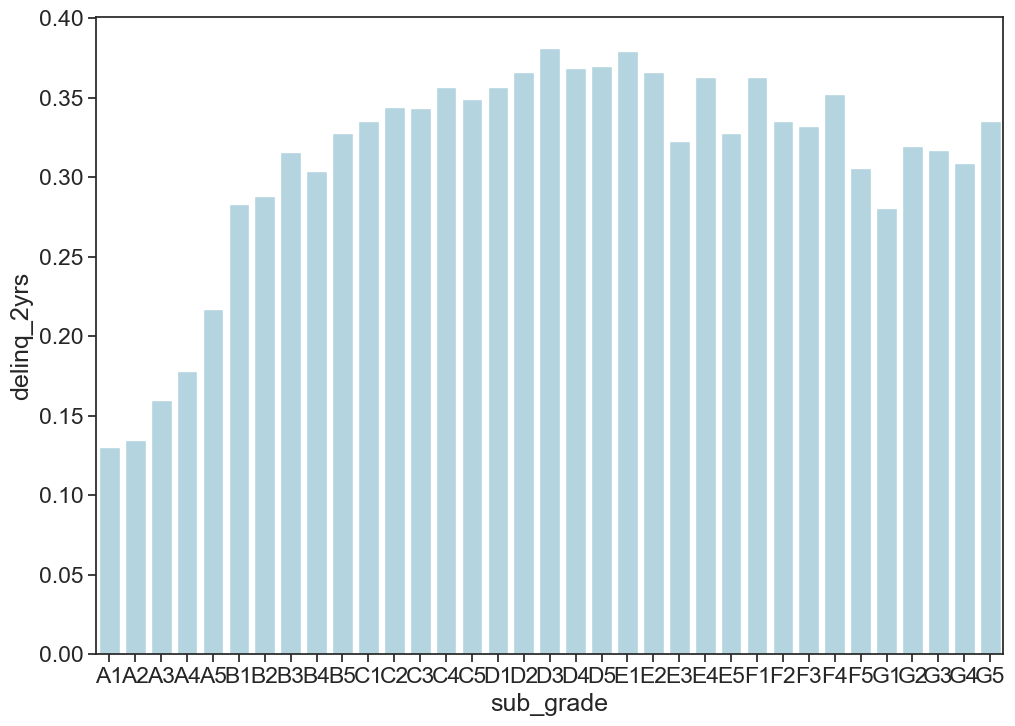

In [48]:
grouped = df.groupby('sub_grade')['delinq_2yrs'].mean().reset_index()

# Plot a bar graph to visualize the relationship between loan grade and delinquency rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.barplot(x='sub_grade', y='delinq_2yrs', data=grouped, color='lightblue')
# rotate x-axis labels

# Conduct a one-way ANOVA test to determine whether the relationship between loan grade and delinquency rate is significant
f_statistic, p_value = stats.f_oneway(df[df['sub_grade'] == 'A1']['delinq_2yrs'], 
                                df[df['sub_grade'] == 'A2']['delinq_2yrs'], 
                                df[df['sub_grade'] == 'A3']['delinq_2yrs'], 
                                df[df['sub_grade'] == 'A4']['delinq_2yrs'], 
                                df[df['sub_grade'] == 'A5']['delinq_2yrs'])
print(f_statistc)
# Print the results
if p_value < 0.05:
    print("The relationship between loan grade and delinquency rate is significant.")
else:
    print("The relationship between loan grade and delinquency rate is not significant.")


In [37]:
df['cur_acct_delinq'].value_counts()

0    1045126
1       3253
2        176
3         14
4          5
6          1
Name: cur_acct_delinq, dtype: int64

F-statistic: 4.817388929102606
P-value: 0.0006958920198385185


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U2'), dtype('float64')) -> None

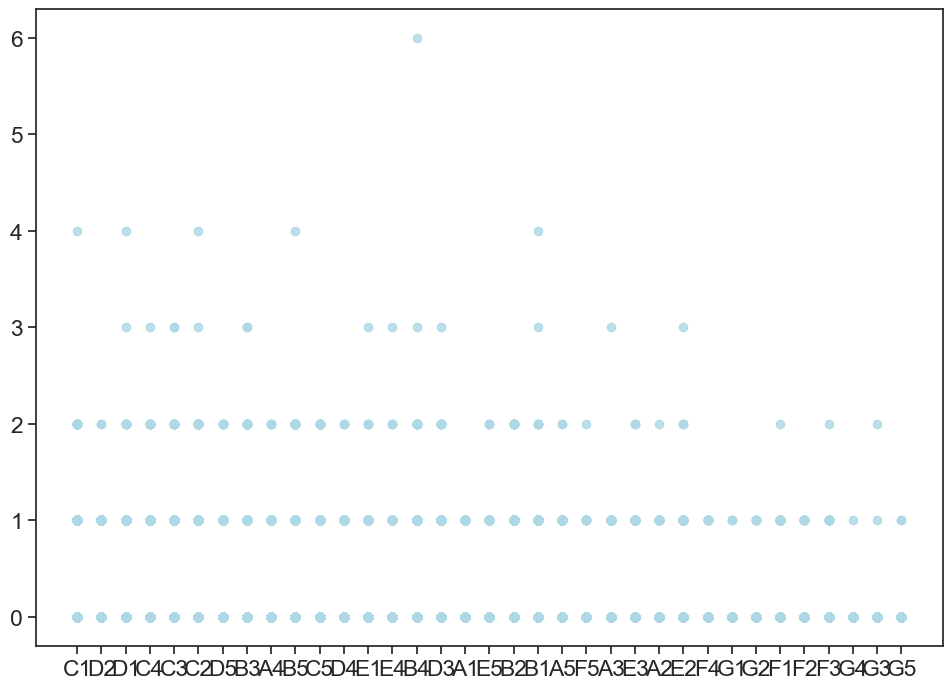

In [41]:
grouped_data = df.groupby('sub_grade')['cur_acct_delinq'].mean()

# Perform a one-way ANOVA test
f_statistic, p_value = stats.f_oneway(df[df['sub_grade'] == 'A1']['cur_acct_delinq'],
                                df[df['sub_grade'] == 'A2']['cur_acct_delinq'],
                                df[df['sub_grade'] == 'A3']['cur_acct_delinq'],
                                df[df['sub_grade'] == 'A4']['cur_acct_delinq'],
                                df[df['sub_grade'] == 'A5']['cur_acct_delinq']) 
print("F-statistic:", f_statistic)
print("P-value:", p_value)
# plot best fit line
sns.regplot(x='sub_grade', y='cur_acct_delinq', data=df, color='lightblue')



AttributeError: 'Series' object has no attribute 'columns'